Importing packages

In [ ]:
import time
start_common = time.time()
import tracemalloc
common_memory_start = tracemalloc.start()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Reading the Data

In [ ]:
import pandas as pd
df=pd.read_csv('cwk_data_lixaj40.csv')
dataframe_df=pd.read_csv('cwk_data_lixaj40.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4000 non-null   int64 
 1   job        4000 non-null   object
 2   marital    4000 non-null   object
 3   education  4000 non-null   object
 4   default    4000 non-null   object
 5   balance    4000 non-null   int64 
 6   housing    4000 non-null   object
 7   loan       4000 non-null   object
 8   contact    4000 non-null   object
 9   day        4000 non-null   int64 
 10  duration   4000 non-null   int64 
 11  campaign   4000 non-null   int64 
 12  pdays      4000 non-null   int64 
 13  previous   4000 non-null   int64 
 14  poutcome   4000 non-null   object
 15  y          4000 non-null   object
dtypes: int64(7), object(9)
memory usage: 500.1+ KB


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,47,admin.,married,secondary,no,6695,no,no,telephone,21,129,3,-1,0,unknown,no
1,26,admin.,single,secondary,no,82,yes,no,unknown,5,228,1,-1,0,unknown,no
2,66,retired,divorced,unknown,no,53,no,no,cellular,12,562,4,-1,0,unknown,yes
3,36,services,divorced,secondary,no,127,no,no,cellular,18,172,3,-1,0,unknown,no
4,44,blue-collar,single,secondary,no,259,yes,no,unknown,6,163,2,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
3995,53,management,married,tertiary,no,2124,yes,no,cellular,17,121,2,344,2,failure,no
3996,30,entrepreneur,married,secondary,no,31,no,no,unknown,8,229,1,-1,0,unknown,no
3997,43,housemaid,married,secondary,no,743,no,yes,cellular,23,323,3,-1,0,unknown,no
3998,53,technician,married,secondary,no,65,no,no,cellular,17,178,1,-1,0,unknown,no
3999,29,self-employed,married,tertiary,no,751,yes,no,unknown,23,121,2,-1,0,unknown,no


Cleaning the data


Summarization

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.086500,1431.796250,15.642000,288.964750,2.718750,43.118500,0.648750
std,10.770679,2935.849718,8.267613,285.210796,3.051471,102.765097,2.080614
min,18.000000,-1884.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,33.000000,78.000000,8.000000,108.000000,1.000000,-1.000000,0.000000
50%,39.000000,478.000000,16.000000,193.500000,2.000000,-1.000000,0.000000
75%,49.000000,1545.500000,21.000000,358.000000,3.000000,-1.000000,0.000000
max,95.000000,42045.000000,31.000000,2516.000000,51.000000,831.000000,58.000000


In [ ]:
print(df)

      age            job   marital  education default  balance housing loan  \
0      47         admin.   married  secondary      no     6695      no   no   
1      26         admin.    single  secondary      no       82     yes   no   
2      66        retired  divorced    unknown      no       53      no   no   
3      36       services  divorced  secondary      no      127      no   no   
4      44    blue-collar    single  secondary      no      259     yes   no   
...   ...            ...       ...        ...     ...      ...     ...  ...   
3995   53     management   married   tertiary      no     2124     yes   no   
3996   30   entrepreneur   married  secondary      no       31      no   no   
3997   43      housemaid   married  secondary      no      743      no  yes   
3998   53     technician   married  secondary      no       65      no   no   
3999   29  self-employed   married   tertiary      no      751     yes   no   

        contact  day  duration  campaign  pdays  pr

In [ ]:
df_corr=df.corr()

df_corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.065622,-0.005111,-0.007790,0.003183,-0.002643,0.002639
balance,0.065622,1.000000,-0.008623,0.027073,-0.004698,-0.008632,0.011359
day,-0.005111,-0.008623,1.000000,-0.018806,0.144182,-0.075506,-0.059791
duration,-0.007790,0.027073,-0.018806,1.000000,-0.076706,-0.008101,-0.009218
campaign,0.003183,-0.004698,0.144182,-0.076706,1.000000,-0.091712,-0.042032
pdays,-0.002643,-0.008632,-0.075506,-0.008101,-0.091712,1.000000,0.543896
previous,0.002639,0.011359,-0.059791,-0.009218,-0.042032,0.543896,1.000000


In [ ]:
value = df['y'].value_counts()
print(value)

no     3149
yes     851
Name: y, dtype: int64


In [ ]:
age_counts = df["age"].value_counts()

In [ ]:
fig = px.bar(age_counts, title="Age of respondents")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

In [ ]:
marital_counts = df["marital"].value_counts()
print(marital_counts)

married     2408
single      1135
divorced     457
Name: marital, dtype: int64


In [ ]:
df_graph = pd.concat([pd.Series(df['marital']),pd.Series(df['y'])], axis = 1)
columns_graph = set(df_graph['marital'])
values = {}
for val in columns_graph:
  v = df.loc[df_graph['marital'] == val, 'y']
  #print(v)
  yes = list(v).count('yes')
  no = list(v).count('no')
  values[val] = {'yes': yes, 'no': no}
print(values)

lst = []
df_graph2 = pd.DataFrame(lst,columns = ['cols','yes','no'])
df_graph2

{'single': {'yes': 299, 'no': 836}, 'married': {'yes': 463, 'no': 1945}, 'divorced': {'yes': 89, 'no': 368}}


,cols,yes,no


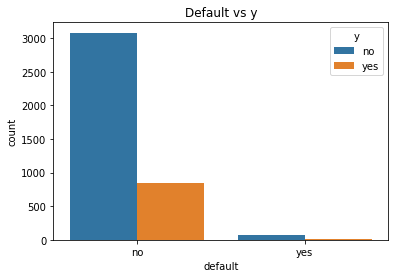

In [ ]:
plt.title('Default vs y')
sns.countplot(data=df, x="default", hue="y")

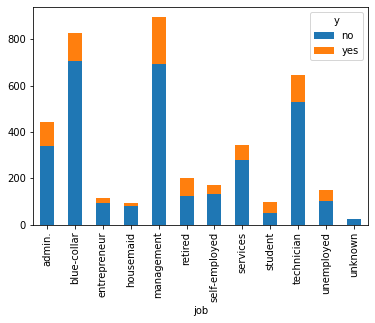

In [ ]:
pd.crosstab(df['job'], df['y']).plot(kind='bar',stacked=True)

In [ ]:
df_graph = pd.concat([pd.Series(df['marital']),pd.Series(df['y'])], axis = 1)
columns_graph = set(df_graph['marital'])
values = {}
for val in columns_graph:
  v = df.loc[df_graph['marital'] == val, 'y']
  yes = list(v).count('yes')
  no = list(v).count('no')
  values[val] = {'yes': yes, 'no': no}
print(values)

lst = []
for key, val in values.items():
  yes = val['yes'] * 100 / (val['yes'] + val['no'])
  no = val['no'] * 100/ (val['yes'] + val['no'])
  lst.append([key,yes,no])


df_graph2 = pd.DataFrame(lst,columns = ['cols','yes','no'])
df_graph2

{'single': {'yes': 299, 'no': 836}, 'married': {'yes': 463, 'no': 1945}, 'divorced': {'yes': 89, 'no': 368}}


,cols,yes,no
0,single,26.343612,73.656388
1,married,19.227575,80.772425
2,divorced,19.474836,80.525164


In [ ]:
print(df_graph2.columns.to_list())

['cols', 'yes', 'no']


In [ ]:
df_graph2

,cols,yes,no
0,single,26.343612,73.656388
1,married,19.227575,80.772425
2,divorced,19.474836,80.525164


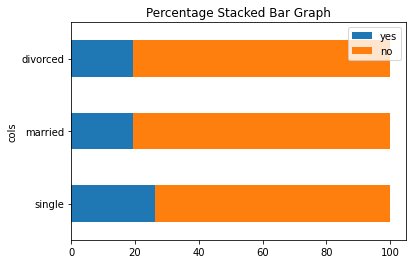

In [ ]:
import numpy as np

df_total = df_graph2["yes"].astype('int') + df_graph2["no"].astype('int')
df_rel = df_graph2[df_graph2.columns[1:]].div(df_total, 0) * 100
  
df_graph2.plot(
  x = 'cols', 
  kind = 'barh', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph', 
  mark_right = True)

Splitting data for analysis

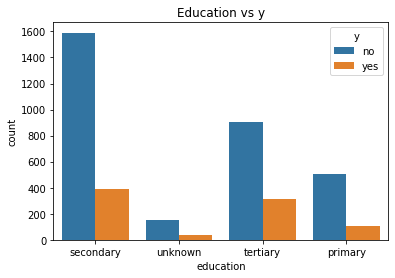

In [ ]:
plt.title('Education vs y')
sns.countplot(data=df, x="education", hue="y")

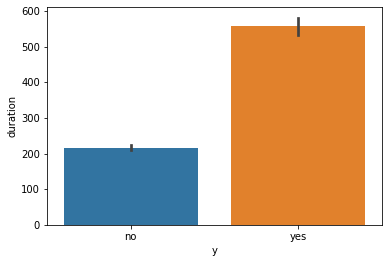

In [ ]:
sns.barplot(x = 'y',y = 'duration',data = df)
plt.show()

Splitting data for test train


In [ ]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 50)

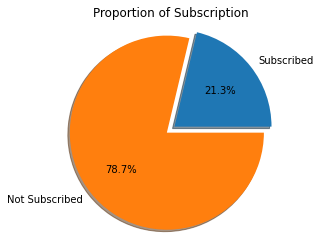

In [ ]:
labels=['Subscribed','Not Subscribed']
sizes=[sum(Y=='yes'),sum(Y=='no')]
explode=(0,0.1)
fig1,ax1 =plt.subplots(figsize=(5,4))
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.title('Proportion of Subscription')
plt.show()

In [ ]:
cols = df.columns
numcols = list(df._get_numeric_data().columns)
catcols = list(set(cols) - set(numcols) - set('y'))
print('Numerical Variables:',numcols)
print('Categorical Variables',catcols)

Numerical Variables: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Variables ['job', 'marital', 'default', 'education', 'contact', 'loan', 'poutcome', 'housing']


In [ ]:
columnTransform = ColumnTransformer([('encoder', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), catcols)], remainder='passthrough')

In [ ]:
current_common, peak_common = tracemalloc.get_traced_memory()
tracemalloc.stop()

end_common = time.time()
common_time = end_common - start_common

Decision Tree classifier

In [ ]:
start_dt = time.time()
dt_memory_start = tracemalloc.start()

DTC=DecisionTreeClassifier(criterion = "gini",random_state = 0, class_weight={'no':2,'yes':8}, max_depth = 3)
clf_gini = Pipeline(steps = [('pre_processing',columnTransform), ('decision_tree', DTC)])
clf_gini.fit(X_train, y_train)

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'poutcome'])])),
                ('decision_tree',
                 DecisionTreeClassifier(class_weight={'no': 2, 'yes': 8},
                                        max_depth=3, random_state=0))])

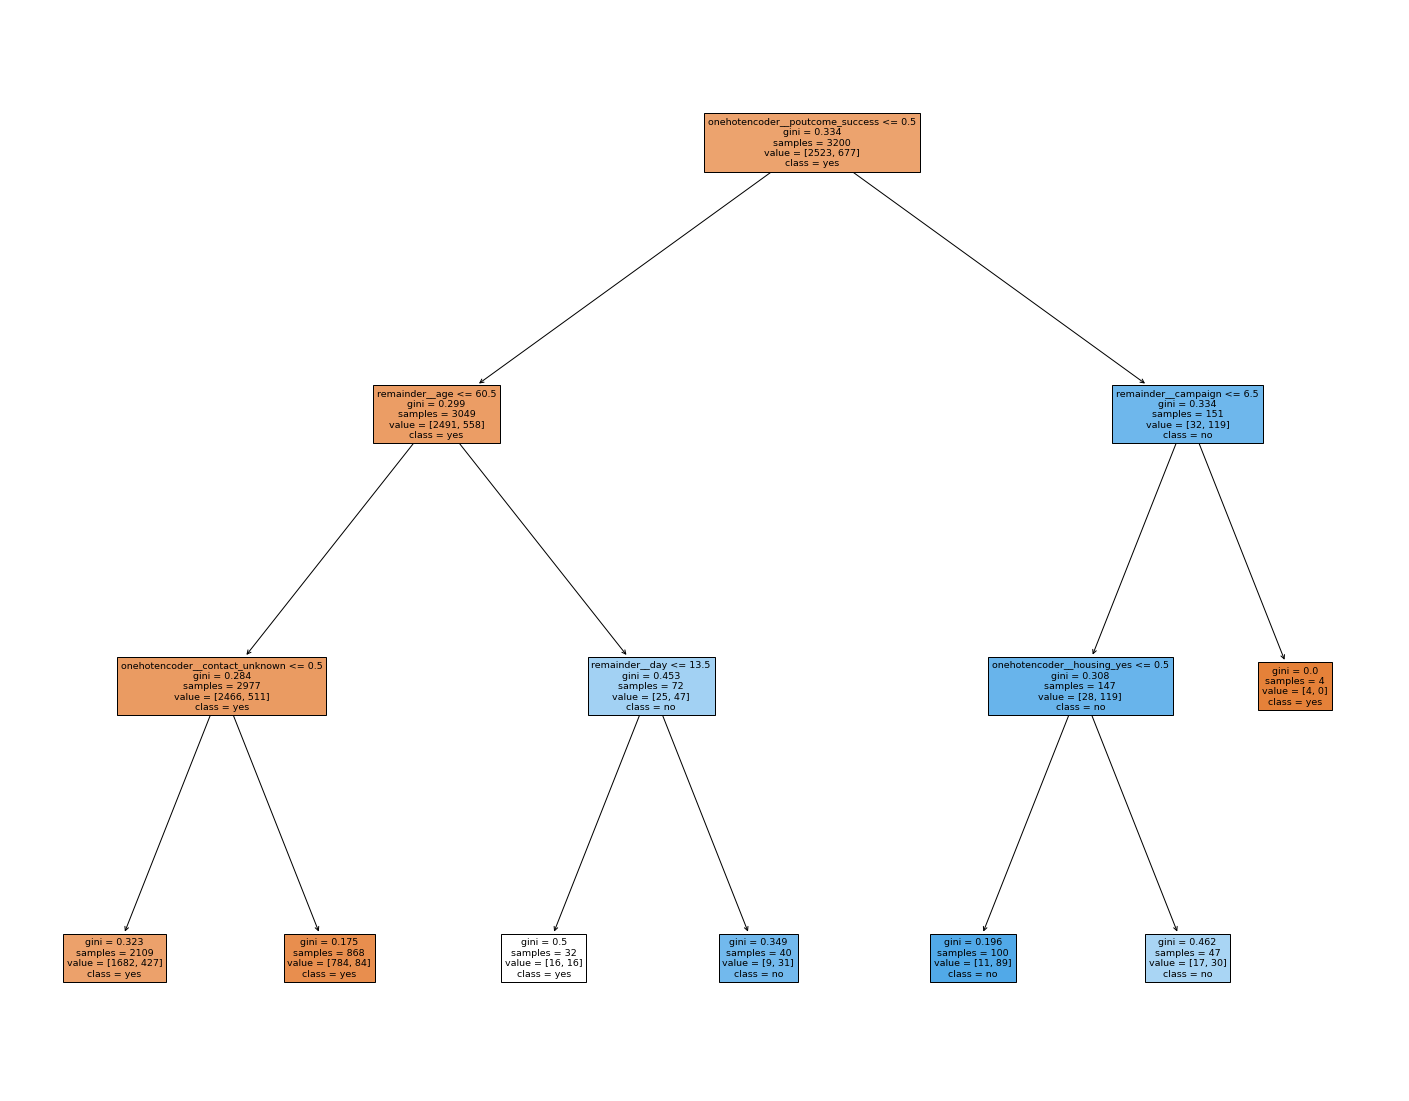

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
# specify which columns need to be one-hot encoded
catcols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

# create the column transformer 
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),catcols),
    remainder='passthrough'
)

# transform the data
X2_transformed = preprocessor.fit_transform(X2)

# split the data into train and test sets
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2_transformed, Y2, test_size=0.2, random_state=0)

# create and fit the decision tree model
tremod = DecisionTreeClassifier(max_depth = 3, random_state = 0, criterion = "gini")
tremod.fit(X2_train, Y2_train)

# make predictions on the test set
y2_pred = tremod.predict(X2_test)

# plot the decision tree
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(tremod, feature_names=preprocessor.get_feature_names_out(), class_names=['yes', 'no'], filled=True)
fig.savefig("decision_tree.png")

In [ ]:
y_pred = clf_gini.predict(X_test)

print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))      
print("Accuracy : ",accuracy_score(y_test,y_pred)*100)    
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[830 112]
 [ 86 172]]
Accuracy :  83.5
Report :                precision    recall  f1-score   support

          no       0.91      0.88      0.89       942
         yes       0.61      0.67      0.63       258

    accuracy                           0.83      1200
   macro avg       0.76      0.77      0.76      1200
weighted avg       0.84      0.83      0.84      1200



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



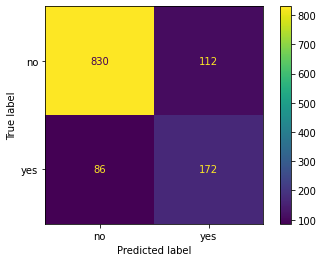

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig = plt.figure()
plot_confusion_matrix(clf_gini,X_test,y_test,display_labels=['no','yes'])
plt.savefig("decision_tree_confusion_matrix")
plt.close(fig)
end_dt = time.time()

Naive Bayes Classifer

In [ ]:
start_nb = time.time()
tracemalloc.start()

from sklearn.naive_bayes import GaussianNB
NBC=GaussianNB()
clf_nb = Pipeline(steps = [('pre_processing',columnTransform), ('naive_bayes', NBC)])
clf_nb.fit(X_train, y_train)
y_pred  =  clf_nb.predict(X_test)
y_pred

array(['yes', 'no', 'no', ..., 'yes', 'no', 'no'], dtype='<U3')

In [ ]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))      
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)    
print("Report :",classification_report(y_test, y_pred))

Confusion Matrix:  [[756 186]
 [105 153]]
Accuracy :  75.75
Report :               precision    recall  f1-score   support

          no       0.88      0.80      0.84       942
         yes       0.45      0.59      0.51       258

    accuracy                           0.76      1200
   macro avg       0.66      0.70      0.68      1200
weighted avg       0.79      0.76      0.77      1200



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



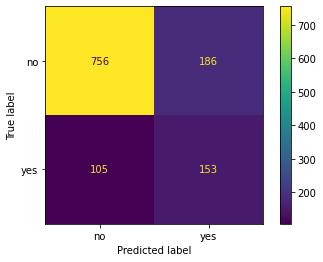

In [ ]:
plot_confusion_matrix(clf_nb,X_test,y_test,display_labels=['no','yes'])
plt.savefig("naive_bays_confusion_matrix")
plt.close(fig)

Random Forest Classifier

In [ ]:
start_rf = time.time()
tracemalloc.start()

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.5,random_state=50)
X_train, y_train = ros.fit_resample(X_train, y_train)


In [ ]:
RFC=RandomForestClassifier(n_estimators = 100, random_state = 50, max_depth = 12 )
clf_rf = Pipeline(steps = [('pre_processing',columnTransform), ('random_forest', RFC)])
clf_rf.fit(X_train,y_train)
y_pred=clf_rf.predict(X_test)

In [ ]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))      
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)    
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[873  69]
 [ 92 166]]
Accuracy :  86.58333333333333
Report :                precision    recall  f1-score   support

          no       0.90      0.93      0.92       942
         yes       0.71      0.64      0.67       258

    accuracy                           0.87      1200
   macro avg       0.81      0.79      0.79      1200
weighted avg       0.86      0.87      0.86      1200



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



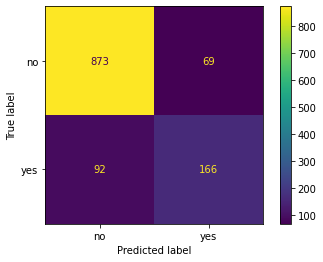

In [ ]:

fig = plt.figure()
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_rf,X_test,y_test,display_labels=['no','yes'])
plt.savefig("random_forest_confusion_matrix")
plt.close(fig)

Training the best performing model

In [ ]:
try:
    dataframe_df.drop(['y'], axis = 1, inplace = True)
except Exception as e:
    pass

In [ ]:
dataframe_df_columns = dataframe_df.columns.values.tolist()

for column in dataframe_df_columns:
    print(dataframe_df[column].isna().sum(), ":", column)

0 : age
0 : job
0 : marital
0 : education
0 : default
0 : balance
0 : housing
0 : loan
0 : contact
0 : day
0 : campaign
0 : pdays
0 : previous
0 : poutcome


In [ ]:
for keys, value in cols_set.items():
    dataframe_df[keys].replace(encoding[keys], inplace=True)

In [ ]:
dataframe_df_columns = dataframe_df.columns.values.tolist()

neglect = ['job', 'marital', 'education', 'default', 'housing', 'contact', 'poutcome', 'loan']

for column in dataframe_df_columns: 
    if column not in neglect:
        dataframe_df[column]=(dataframe_df[column]-dataframe_df[column].min())/(dataframe_df[column].max()-dataframe_df[column].min())

In [ ]:
print(list(dataframe_df.columns.values))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'campaign', 'pdays', 'previous', 'poutcome']


In [ ]:
X_pred = dataframe_df
X_pred.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 50)

In [ ]:
start_rf = time.time()
tracemalloc.start()

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.5,random_state=50)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
RFC=RandomForestClassifier(n_estimators = 100, random_state = 50, max_depth = 12 )
clf_rf = Pipeline(steps = [('pre_processing',columnTransform), ('random_forest', RFC)])
clf_rf.fit(X_train,y_train)
y_pred=clf_rf.predict(X_train)

In [ ]:
print("Confusion Matrix: ",confusion_matrix(y_train, y_pred))      
print("Accuracy : ",accuracy_score(y_train,y_pred)*100)    
print("Report : ",classification_report(y_train, y_pred))

Confusion Matrix:  [[2185   22]
 [  88 1015]]
Accuracy :  96.67673716012085
Report :                precision    recall  f1-score   support

          no       0.96      0.99      0.98      2207
         yes       0.98      0.92      0.95      1103

    accuracy                           0.97      3310
   macro avg       0.97      0.96      0.96      3310
weighted avg       0.97      0.97      0.97      3310



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



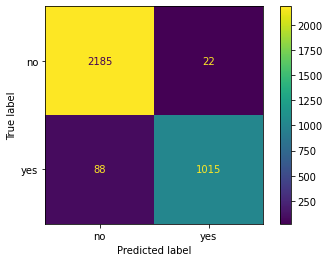

In [ ]:
fig = plt.figure()
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_rf,X_train,y_train,display_labels=['no','yes'])
plt.savefig("random_forest_confusion_matrix")
plt.close(fig)